time for random hill climbing : 0.007905051999841817
time for simulated annealing : 0.007802418000210309
time for genetic algorithm : 3.619062923000456
time for mimic : 758.8224281610019
random_hill_climbing =  (array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 3.0, array([[  2.,   1.],
       [  2.,   2.],
       [  2.,   3.],
       [  2.,   4.],
       [  2.,   5.],
       [  2.,   6.],
       [  2.,   7.],
       [  2.,   8.],
       [  2.,   9.],
       [  2.,  10.],
       [  2.,  11.],
       [  2.,  12.],
       [  2.,  13.],
       [  2.,  14.],
       [  2.,  15.],
       [  2.,  16.],
       [  2.,  17.],
       [  2.,  18.],
       [  2.,  19.],
       [  2.,  20.],
       [  2.,  21.],
     

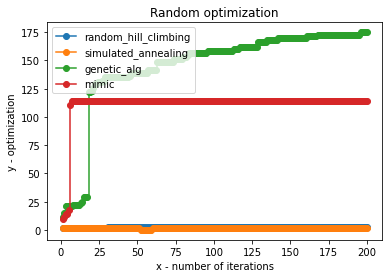

In [51]:
# All algorithms

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 200
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FourPeaks(t_pct=0.1)
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)
print('mimic = ',mimic)


iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(max_iters)]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(max_iters)]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]
y_mimic = [mimic[2][i][0] for i in range(max_iters)]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations , y_genetic_alg ,marker="o",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations , y_mimic ,marker="o", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

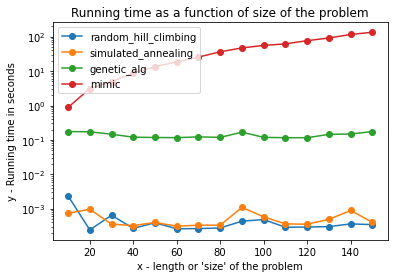

In [11]:
# implementation time with logarithmic scale
import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

time_random_hill_climbing = []
time_simulated_annealing = []
time_genetic_alg = []
time_mimic = []

for k in range(10,160,10):
    # length (int) – Number of elements in state vector.
    length = k
    # fitness_fn (fitness function object) – Object to implement fitness function for optimization.
    fitness_fn = mlrose_hiive.FourPeaks(t_pct=0.1)
    
    problem = mlrose_hiive.DiscreteOpt(length , fitness_fn = fitness_fn, maximize=True, max_val=length)

    # Maximum number of attempts to find a better neighbor at each step.
    max_attempts = 20
    # Maximum number of iterations of the algorithm
    max_iters = 10

    time1 = time.perf_counter()
    random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=None)

    time2 = time.perf_counter()
    timeA = time2 - time1
    time_random_hill_climbing.append(timeA)

    simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=None)

    time3 = time.perf_counter()
    timeB = time3 - time2
    time_simulated_annealing.append(timeB)

    genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=None)

    time4 = time.perf_counter()
    timeC = time4 - time3
    time_genetic_alg.append(timeC)

    mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=None)

    time5 = time.perf_counter()
    timeD = time5 - time4
    time_mimic.append(timeD)



# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time in seconds")
ax.set_yscale("log")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()

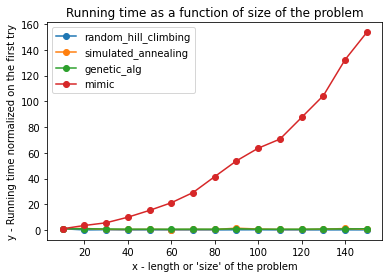

In [12]:
# implementation time with normal scale

time_random_hill_climbing_normalized = [time_random_hill_climbing[i]/time_random_hill_climbing[0] for i in range(len(time_random_hill_climbing))]
time_simulated_annealing_normalized = [time_simulated_annealing[i]/time_simulated_annealing[0] for i in range(len(time_simulated_annealing))]
time_genetic_alg_normalized = [time_genetic_alg[i]/time_genetic_alg[0] for i in range(len(time_genetic_alg))]
time_mimic_normalized = [time_mimic[i]/time_mimic[0] for i in range(len(time_mimic))]

# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing_normalized , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing_normalized ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg_normalized ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic_normalized ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time normalized on the first try")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()

time for random hill climbing : 0.059725642000557855
time for simulated annealing : 0.20651916599672404
time for genetic algorithm : 9.985255255000084
time for mimic : 979.395374906002
random_hill_climbing =  (array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 59.0, array([[2.000e+00, 1.000e+00],
       [2.000e+00, 2.000e+00],
       [2.000e+00, 3.000e+00],
       ...,
       [5.900e+01, 2.533e+03],
       [5.900e+01, 2.534e+03],
       [5.900e+01, 2.535e+03]]))
simulated_annealing =  (array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

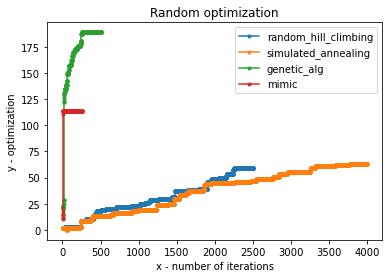

In [54]:
# All algorithms with max attemps different than max iters.

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 4000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = 250

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FourPeaks(t_pct=0.1)
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=length)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)
print('mimic = ',mimic)

iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(len(random_hill_climbing[2]))]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(len(simulated_annealing[2]))]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(len(genetic_alg[2]))]
y_mimic = [mimic[2][i][0] for i in range(len(mimic[2]))]

iterations_rhc = np.linspace(1,len(random_hill_climbing[2]),len(random_hill_climbing[2]),dtype="int")
iterations_sa = np.linspace(1,len(simulated_annealing[2]),len(simulated_annealing[2]),dtype="int")
iterations_ga = np.linspace(1,len(genetic_alg[2]),len(genetic_alg[2]),dtype="int")
iterations_m = np.linspace(1,len(mimic[2]),len(mimic[2]),dtype="int")


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations_rhc , y_random_hill_climbing , marker=".", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations_sa , y_simulated_annealing ,marker=".",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations_ga , y_genetic_alg ,marker=".",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations_m , y_mimic ,marker=".", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for random hill climbing : 0.07484485600070911
time for random hill climbing : 0.2549997819987766


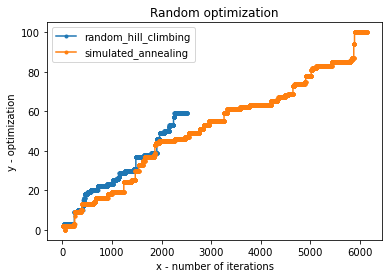

In [10]:
# RHC and SA with max attemps different than max iters.

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 10000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = 250

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FourPeaks(t_pct=0.1)
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for random hill climbing :', timeB)

y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(len(random_hill_climbing[2]))]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(len(simulated_annealing[2]))]

iterations_rhc = np.linspace(1,len(random_hill_climbing[2]),len(random_hill_climbing[2]),dtype="int")
iterations_sa = np.linspace(1,len(simulated_annealing[2]),len(simulated_annealing[2]),dtype="int")

#print('y_random_hill_climbing :',y_random_hill_climbing)
#print('y_simulated_annealing :',y_simulated_annealing)

# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations_rhc , y_random_hill_climbing , marker=".", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations_sa , y_simulated_annealing ,marker=".",label="simulated_annealing",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()